In [2]:
from bs4 import BeautifulSoup as bs
import datetime as dt
from urllib.request import urlopen

In [3]:
def date_format(d):
    d = str(d).replace('-','.')
    yyyy = int(d.split('.')[0])
    mm = int(d.split('.')[1])
    dd = int(d.split('.')[2])
    this_date = dt.date(yyyy,mm,dd)
    return this_date

In [4]:

def his_naver_index(his_prices, index_cd, start_date='', end_date='', page_n=1, last_page=0):
    #date 정리
    if start_date :
        start_date = date_format(start_date)
    else :
        start_date = dt.date.today()
    if end_date :
        end_date = date_format(end_date)
    else :
        end_date = dt.date.today()
    # bs 하기 및 저장
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    source = urlopen(naver_index).read()
    source = bs(source,'lxml') # .prettify
    dates = source.find_all('td',class_="date")
    prices = source.find_all('td',class_="number_1")
    # 사이값만 저장하기
    for n in range(len(dates)):
        # 날짜 처리 및 확인
        this_date = dates[n].text
        if this_date.split('.')[0].isdigit() :
            this_date = date_format(this_date)
            if start_date <= this_date and end_date >= this_date:
                this_price = float(prices[4*n].text.replace(',','')) # '23,429.30' -> 23429.30 (float)
                his_prices[this_date] = this_price # 딕셔너리에 저장
            elif start_date > this_date :
                return his_prices
        #마지막페이지 주소 추출
    if last_page == 0 :
        last_page = source.find('td',class_='pgRR').find('a')['href']
        # '/sise/sise_index_day.nhn?code=KPI200&page=547' - > 547
        last_page = last_page.split('&')[1].split('=')[1]
        last_page = int(last_page)
    # 다음 페이지 호출
    if last_page > page_n :
        page_n = page_n + 1
        his_naver_index(his_prices,index_cd, start_date, end_date, page_n, last_page)
    return his_prices


In [5]:
index_cd = 'KPI200'
KPI_prices = dict()
his_naver_index(KPI_prices,index_cd,"2019-2-1","2019-4-4")
KPI_prices

{datetime.date(2019, 4, 4): 286.15,
 datetime.date(2019, 4, 3): 285.65,
 datetime.date(2019, 4, 2): 281.72,
 datetime.date(2019, 4, 1): 280.32,
 datetime.date(2019, 3, 29): 276.48,
 datetime.date(2019, 3, 28): 275.08,
 datetime.date(2019, 3, 27): 277.28,
 datetime.date(2019, 3, 26): 277.6,
 datetime.date(2019, 3, 25): 277.45,
 datetime.date(2019, 3, 22): 283.13,
 datetime.date(2019, 3, 21): 282.38,
 datetime.date(2019, 3, 20): 279.92,
 datetime.date(2019, 3, 19): 279.82,
 datetime.date(2019, 3, 18): 279.93,
 datetime.date(2019, 3, 15): 279.87,
 datetime.date(2019, 3, 14): 276.64,
 datetime.date(2019, 3, 13): 276.0,
 datetime.date(2019, 3, 12): 277.73,
 datetime.date(2019, 3, 11): 275.06,
 datetime.date(2019, 3, 8): 274.84,
 datetime.date(2019, 3, 7): 278.87,
 datetime.date(2019, 3, 6): 279.85,
 datetime.date(2019, 3, 5): 280.45,
 datetime.date(2019, 3, 4): 282.51,
 datetime.date(2019, 2, 28): 283.8,
 datetime.date(2019, 2, 27): 288.76,
 datetime.date(2019, 2, 26): 287.89,
 datetime.dat

In [6]:
index_kosdaq = 'KOSDAQ'
DAQ_prices = dict()
his_naver_index(DAQ_prices,index_kosdaq,"2019-2-1","2019-4-4")
DAQ_prices

{datetime.date(2019, 4, 4): 751.58,
 datetime.date(2019, 4, 3): 749.3,
 datetime.date(2019, 4, 2): 739.57,
 datetime.date(2019, 4, 1): 736.81,
 datetime.date(2019, 3, 29): 729.31,
 datetime.date(2019, 3, 28): 719.72,
 datetime.date(2019, 3, 27): 728.45,
 datetime.date(2019, 3, 26): 736.81,
 datetime.date(2019, 3, 25): 727.21,
 datetime.date(2019, 3, 22): 743.97,
 datetime.date(2019, 3, 21): 743.52,
 datetime.date(2019, 3, 20): 749.76,
 datetime.date(2019, 3, 19): 748.91,
 datetime.date(2019, 3, 18): 753.13,
 datetime.date(2019, 3, 15): 748.36,
 datetime.date(2019, 3, 14): 755.42,
 datetime.date(2019, 3, 13): 754.89,
 datetime.date(2019, 3, 12): 754.76,
 datetime.date(2019, 3, 11): 739.09,
 datetime.date(2019, 3, 8): 735.97,
 datetime.date(2019, 3, 7): 736.83,
 datetime.date(2019, 3, 6): 746.7,
 datetime.date(2019, 3, 5): 747.95,
 datetime.date(2019, 3, 4): 748.07,
 datetime.date(2019, 2, 28): 731.25,
 datetime.date(2019, 2, 27): 752.16,
 datetime.date(2019, 2, 26): 747.09,
 datetime.da

In [7]:
#데이터 프레임으로 여러 딕셔너리 테이블 하나로 합치기

In [8]:
tmp ={'KPI200' : KPI_prices, 'KOSDAQ' : DAQ_prices}
tmp

{'KPI200': {datetime.date(2019, 4, 4): 286.15,
  datetime.date(2019, 4, 3): 285.65,
  datetime.date(2019, 4, 2): 281.72,
  datetime.date(2019, 4, 1): 280.32,
  datetime.date(2019, 3, 29): 276.48,
  datetime.date(2019, 3, 28): 275.08,
  datetime.date(2019, 3, 27): 277.28,
  datetime.date(2019, 3, 26): 277.6,
  datetime.date(2019, 3, 25): 277.45,
  datetime.date(2019, 3, 22): 283.13,
  datetime.date(2019, 3, 21): 282.38,
  datetime.date(2019, 3, 20): 279.92,
  datetime.date(2019, 3, 19): 279.82,
  datetime.date(2019, 3, 18): 279.93,
  datetime.date(2019, 3, 15): 279.87,
  datetime.date(2019, 3, 14): 276.64,
  datetime.date(2019, 3, 13): 276.0,
  datetime.date(2019, 3, 12): 277.73,
  datetime.date(2019, 3, 11): 275.06,
  datetime.date(2019, 3, 8): 274.84,
  datetime.date(2019, 3, 7): 278.87,
  datetime.date(2019, 3, 6): 279.85,
  datetime.date(2019, 3, 5): 280.45,
  datetime.date(2019, 3, 4): 282.51,
  datetime.date(2019, 2, 28): 283.8,
  datetime.date(2019, 2, 27): 288.76,
  datetime.dat

In [9]:
import pandas as pd
df = pd.DataFrame(tmp)
#데이터 보간
df = df.fillna(method="ffill")
if df.isnull().values.any():
    df = df.fillna(method="bfill")
df.head(10)

,KPI200,KOSDAQ
2019-02-01,285.79,716.92
2019-02-07,285.65,728.79
2019-02-08,281.49,728.74
2019-02-11,282.10,733.47
2019-02-12,283.69,730.58
2019-02-13,284.97,739.91
2019-02-14,288.68,742.27
2019-02-15,283.98,738.66
2019-02-18,285.90,745.33
2019-02-19,284.91,748.05


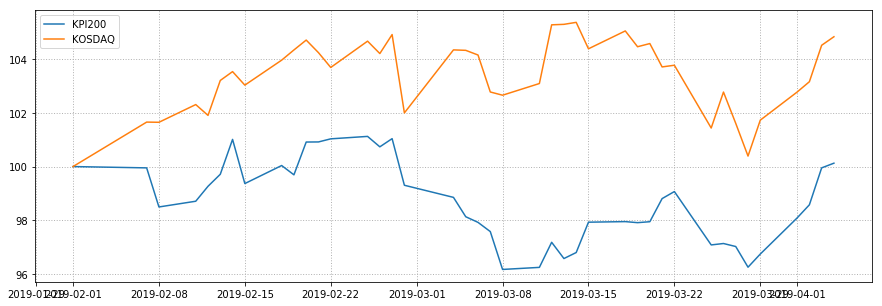

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#설정
df_ratio = df.iloc[0:]/df.iloc[0] *100
plt.figure(figsize=(15,5)) #크기 조절
plt.plot(df_ratio['KPI200'] ) # 데이터 선택
plt.plot(df_ratio['KOSDAQ'] )
plt.legend(loc=0) # 범례 위치 지정
plt.grid(True, color='0.7',linestyle=":",linewidth=1) # 그리드 설정

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_ratio['KPI200']
y = df_ratio['KOSDAQ']

# 한개 칼럼 np.array 로 변환
independent_var = np.array(x).reshape(-1,1)
dependent_var = np.array(y).reshape(-1,1)

#linear regression
regr = LinearRegression()
regr.fit(independent_var,dependent_var)

result ={'Slope': regr.coef_[0,0], 'Intercept' : regr.intercept_[0], 'R^2' : regr.score(independent_var,dependent_var)}
result

{'Slope': 0.1832201404963507,
 'Intercept': 85.3405454537293,
 'R^2': 0.04167462842695657}

Text(0, 0.5, 'KOSDAQ')

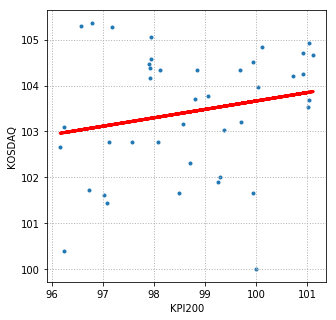

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(df_ratio['KPI200'],df_ratio['KOSDAQ'],marker='.')
plt.plot(independent_var, regr.predict(independent_var), color='r', linewidth=3)
plt.grid(True, color='0.7', linestyle=":", linewidth=1)
plt.xlabel('KPI200')
plt.ylabel('KOSDAQ')